# **PROJECT:** Performance of Players Analytic for Each Club



In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Players

In [5]:
players = pd.read_csv("archive/players.csv")
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0
30495,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,NaN,2026-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


In [6]:
# players.info()
print(players.isnull().sum())
print(players.duplicated().sum())

player_id                                   0
first_name                               1987
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2720
city_of_birth                            2197
country_of_citizenship                    579
date_of_birth                              45
sub_position                              174
position                                    0
foot                                     2365
height_in_cm                             2047
contract_expiration_date                11436
agent_name                              15371
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                           0
market_value_in_eur               

In [7]:
players['date_of_birth'] = pd.to_datetime(players["date_of_birth"], format="%Y-%m-%d")
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30499 entries, 0 to 30498
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             30499 non-null  int64         
 1   first_name                            28512 non-null  object        
 2   last_name                             30499 non-null  object        
 3   name                                  30499 non-null  object        
 4   last_season                           30499 non-null  int64         
 5   current_club_id                       30499 non-null  int64         
 6   player_code                           30499 non-null  object        
 7   country_of_birth                      27779 non-null  object        
 8   city_of_birth                         28302 non-null  object        
 9   country_of_citizenship                29920 non-null  object        
 10

In [8]:
# Dropping the column
players_cleaned = players.drop(columns=['contract_expiration_date','agent_name'])
players_cleaned = players_cleaned.dropna()
print(players_cleaned.isnull().sum())

player_id                               0
first_name                              0
last_name                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
image_url                               0
url                                     0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
dtype: int64


In [9]:
abs(players_cleaned.select_dtypes(exclude='object').corr())

,player_id,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur
player_id,1.000000,0.514380,0.059959,0.863811,0.001083,0.129198,0.053403
last_season,0.514380,1.000000,0.077636,0.578664,0.061956,0.254530,0.239538
current_club_id,0.059959,0.077636,1.000000,0.017457,0.024995,0.069248,0.096615
date_of_birth,0.863811,0.578664,0.017457,1.000000,0.009727,0.172893,0.012807
height_in_cm,0.001083,0.061956,0.024995,0.009727,1.000000,0.011300,0.004276
market_value_in_eur,0.129198,0.254530,0.069248,0.172893,0.011300,1.000000,0.785972
highest_market_value_in_eur,0.053403,0.239538,0.096615,0.012807,0.004276,0.785972,1.000000


# Appearances

In [10]:
appearances = pd.read_csv("archive/appearances.csv")
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


In [11]:
print(appearances.isnull().sum())
print(appearances.duplicated().sum())

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64
0


In [12]:
# Merge appearances and players DataFrames on player_id
merged_df = appearances.merge(players[['player_id', 'name']], how='left', on='player_id')

appearances_cleaned = appearances

# Fill null values in player_name with the merged values
appearances_cleaned['player_name'] = merged_df['name'].fillna(method='ffill')

print(appearances_cleaned.isnull().sum())
print(appearances_cleaned.duplicated().sum())

/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_33295/812586121.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  appearances_cleaned['player_name'] = merged_df['name'].fillna(method='ffill')


appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64
0


In [13]:
appearances_cleaned['date'] = pd.to_datetime(appearances_cleaned["date"], format="%Y-%m-%d")
appearances_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556969 entries, 0 to 1556968
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1556969 non-null  object        
 1   game_id                 1556969 non-null  int64         
 2   player_id               1556969 non-null  int64         
 3   player_club_id          1556969 non-null  int64         
 4   player_current_club_id  1556969 non-null  int64         
 5   date                    1556969 non-null  datetime64[ns]
 6   player_name             1556969 non-null  object        
 7   competition_id          1556969 non-null  object        
 8   yellow_cards            1556969 non-null  int64         
 9   red_cards               1556969 non-null  int64         
 10  goals                   1556969 non-null  int64         
 11  assists                 1556969 non-null  int64         
 12  minutes_played

In [14]:
abs(appearances_cleaned.select_dtypes(exclude='object').corr())

,game_id,player_id,player_club_id,player_current_club_id,date,yellow_cards,red_cards,goals,assists,minutes_played
game_id,1.000000,0.598288,0.079697,0.020799,0.988758,0.015481,0.003643,0.006201,0.010311,0.083361
player_id,0.598288,1.000000,0.084634,0.040140,0.588150,0.015960,0.002354,0.011313,0.012910,0.152945
player_club_id,0.079697,0.084634,1.000000,0.581165,0.070580,0.016501,0.001681,0.016306,0.017381,0.005790
player_current_club_id,0.020799,0.040140,0.581165,1.000000,0.011980,0.015435,0.001215,0.018045,0.016736,0.015428
date,0.988758,0.588150,0.070580,0.011980,1.000000,0.016054,0.004111,0.006511,0.010663,0.081176
yellow_cards,0.015481,0.015960,0.016501,0.015435,0.016054,1.000000,0.012613,0.001342,0.001779,0.108362
red_cards,0.003643,0.002354,0.001681,0.001215,0.004111,0.012613,1.000000,0.009112,0.007780,0.035359
goals,0.006201,0.011313,0.016306,0.018045,0.006511,0.001342,0.009112,1.000000,0.074512,0.079037
assists,0.010311,0.012910,0.017381,0.016736,0.010663,0.001779,0.007780,0.074512,1.000000,0.077610
minutes_played,0.083361,0.152945,0.005790,0.015428,0.081176,0.108362,0.035359,0.079037,0.077610,1.000000


**Clubs**

In [15]:
clubs = pd.read_csv("archive/clubs.csv")
clubs

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-895k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,26.7,17,48.6,13,Tüpraş Stadyumu,42590,€-26.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,NaN,31,22.2,17,54.8,4,Kras Stadion,7384,+€2.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,26.6,17,68.0,16,Gewiss Stadium,21747,+€73.82m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,29,25.7,17,58.6,3,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [16]:
print(clubs.isnull().sum())
print(clubs.duplicated().sum())

club_id                      0
club_code                    0
name                         0
domestic_competition_id      0
total_market_value         426
squad_size                   0
average_age                 38
foreigners_number            0
foreigners_percentage       48
national_team_players        0
stadium_name                 0
stadium_seats                0
net_transfer_record          0
coach_name                 426
last_season                  0
filename                     0
url                          0
dtype: int64
0


In [17]:
clubs_id = clubs['club_id']
for club in np.array(clubs_id):
    filtered_players = players_cleaned[players_cleaned['current_club_id'] == club]
    clubs.loc[clubs['club_id'] == club, 'total_market_value'] = filtered_players['market_value_in_eur'].sum()
clubs

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,48200000.0,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,39650000.0,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-895k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,130630000.0,35,26.7,17,48.6,13,Tüpraş Stadyumu,42590,€-26.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,347945000.0,26,26.9,18,69.2,16,Olimpico di Roma,73261,+€63.00m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,760900000.0,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,5860000.0,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,14725000.0,31,22.2,17,54.8,4,Kras Stadion,7384,+€2.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,377370000.0,25,26.6,17,68.0,16,Gewiss Stadium,21747,+€73.82m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,20200000.0,29,25.7,17,58.6,3,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/moreirense-fc/...


In [18]:
# Dropping the column
clubs_cleaned = clubs.drop(columns=['total_market_value','coach_name'])
clubs_cleaned = clubs_cleaned.dropna()
print(clubs_cleaned.isnull().sum())

club_id                    0
club_code                  0
name                       0
domestic_competition_id    0
squad_size                 0
average_age                0
foreigners_number          0
foreigners_percentage      0
national_team_players      0
stadium_name               0
stadium_seats              0
net_transfer_record        0
last_season                0
filename                   0
url                        0
dtype: int64


In [19]:
clubs_features = clubs[clubs['last_season'] >= 2023]

**Club Games**

In [20]:
club_games = pd.read_csv("archive/club_games.csv") #games in 2012 - 2023
club_games

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0
...,...,...,...,...,...,...,...,...,...,...,...
134837,3142950,681,0,NaN,Imanol Alguacil,150,0,NaN,Quique Setién,Away,0
134838,3148382,150,1,NaN,Quique Setién,714,1,NaN,Rubi,Away,0
134839,3153158,418,1,NaN,Santiago Solari,131,1,NaN,Ernesto Valverde,Away,0
134840,3307741,36661,1,NaN,Aleksandr Gorshkov,32218,2,NaN,Viktor Antikhovich,Away,0


In [21]:
print(club_games.isnull().sum())
print(club_games.shape)

game_id                      0
club_id                      0
own_goals                    0
own_position             39944
own_manager_name          1492
opponent_id                  0
opponent_goals               0
opponent_position        39944
opponent_manager_name     1492
hosting                      0
is_win                       0
dtype: int64
(134842, 11)


In [22]:
# Dropping the column
club_games_cleaned = club_games.drop(columns=['own_position','own_manager_name','opponent_position','opponent_manager_name'])
# club_games_cleaned = club_games.dropna()
print(club_games_cleaned.isnull().sum())
print(club_games_cleaned.shape)

game_id           0
club_id           0
own_goals         0
opponent_id       0
opponent_goals    0
hosting           0
is_win            0
dtype: int64
(134842, 7)


In [23]:
clubs_games_filter = club_games_cleaned[club_games_cleaned['club_id'].isin(clubs_features.club_id)]
clubs_games_filter.shape

(82173, 7)

In [24]:
clubs_games_total_win = clubs_games_filter.groupby('club_id')['is_win'].sum()
clubs_games_total_win

club_id
3        102
5        286
11       353
12       307
13       376
        ... 
55686     19
60551     74
60949     47
61825     23
63007     10
Name: is_win, Length: 238, dtype: int64

In [25]:
clubs_clean_modify = clubs_features.merge(clubs_games_total_win, on='club_id', how='inner')

In [26]:
clubs_clean_modify.sort_values(by='is_win', ascending=False).head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url,is_win
38,131,fc-barcelona,Futbol Club Barcelona,ES1,5.558250e+08,26,24.9,11,42.3,17,Olímpic Lluís Companys,49472,+€64.04m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-barcelona/s...,458
150,418,real-madrid,Real Madrid Club de Fútbol,ES1,8.176750e+08,24,27.3,17,70.8,21,Santiago Bernabéu,81044,€-122.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/real-madrid/st...,458
223,27,fc-bayern-munchen,FC Bayern München,L1,1.039025e+09,27,26.7,16,59.3,19,Allianz Arena,75024,€-14.25m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-bayern-munc...,454
178,281,manchester-city,Manchester City Football Club,GB1,1.180175e+09,22,26.8,16,72.7,19,Etihad Stadium,55017,€-133.80m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-cit...,433
137,371,celtic-glasgow,The Celtic Football Club,SC1,1.648850e+08,28,25.8,21,75.0,15,Celtic Park,60832,+€20.34m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/celtic-glasgow...,416


In [27]:
clubs_clean_modify[clubs_clean_modify['domestic_competition_id'] == 'GB1'].sort_values(by='is_win', ascending=False).head(6)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url,is_win
178,281,manchester-city,Manchester City Football Club,GB1,1.180175e+09,22,26.8,16,72.7,19,Etihad Stadium,55017,€-133.80m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-cit...,433
24,31,fc-liverpool,Liverpool Football Club,GB1,8.027000e+08,28,25.6,21,75.0,18,Anfield,54074,€-111.30m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-liverpool/s...,363
216,631,fc-chelsea,Chelsea Football Club,GB1,9.693750e+08,30,23.6,19,63.3,17,Stamford Bridge,40853,€-198.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-chelsea/sta...,353
174,11,fc-arsenal,Arsenal Football Club,GB1,1.071125e+09,25,25.6,18,72.0,20,Emirates Stadium,60704,€-167.04m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/fc-arsenal/sta...,353
124,985,manchester-united,Manchester United Football Club,GB1,7.190500e+08,27,26.4,19,70.4,20,Old Trafford,74879,€-146.96m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/manchester-uni...,348
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,7.609000e+08,26,25.4,20,76.9,21,Tottenham Hotspur Stadium,62850,€-151.40m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,317


competitions

In [28]:
competitions = pd.read_csv("archive/competitions.csv")
competitions.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False


In [29]:
# Dropping the column
# club_games_cleaned = club_games.drop(columns=['own_position','own_manager_name','opponent_position','opponent_manager_name'])
# club_games_cleaned = club_games.dropna()
print(competitions.isnull().sum())
print(competitions.shape)

competition_id              0
competition_code            0
name                        0
sub_type                    0
type                        0
country_id                  0
country_name                7
domestic_league_code        7
confederation               0
url                         0
is_major_national_league    0
dtype: int64
(43, 11)


In [30]:
# Dropping the column
competitions_cleaned = competitions.fillna(0)
print(competitions_cleaned.isnull().sum())
print(competitions_cleaned.shape)

competition_id              0
competition_code            0
name                        0
sub_type                    0
type                        0
country_id                  0
country_name                0
domestic_league_code        0
confederation               0
url                         0
is_major_national_league    0
dtype: int64
(43, 11)


game events

In [31]:
game_events = pd.read_csv("archive/game_events.csv")
game_events.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


game lineups

In [67]:
game_lineups = pd.read_csv("archive/game_lineups.csv")
game_lineups.head()

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0


In [68]:
print(game_lineups.isnull().sum())
print(game_lineups.shape)

game_lineups_id    0
date               0
game_id            0
player_id          0
club_id            0
player_name        0
type               0
position           3
number             0
team_captain       0
dtype: int64
(2145222, 10)


In [70]:
# Dropping the column
game_lineups_cleaned = game_lineups.dropna()
print(game_lineups_cleaned.isnull().sum())
print(game_lineups_cleaned.shape)

game_lineups_id    0
date               0
game_id            0
player_id          0
club_id            0
player_name        0
type               0
position           0
number             0
team_captain       0
dtype: int64
(2145219, 10)


games

In [35]:
games = pd.read_csv("archive/games.csv")
games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [36]:
print(games.isnull().sum())
print(games.shape)

game_id                       0
competition_id                0
season                        0
round                         0
date                          0
home_club_id                  0
away_club_id                  0
home_club_goals               0
away_club_goals               0
home_club_position        19972
away_club_position        19972
home_club_manager_name      746
away_club_manager_name      746
stadium                     214
attendance                 9703
referee                     598
url                           0
home_club_formation        6598
away_club_formation        6452
home_club_name            11450
away_club_name            10212
aggregate                     0
competition_type              0
dtype: int64
(67421, 23)


In [37]:
# Dropping the column
games_cleaned = games.drop(columns=['home_club_position','home_club_position','home_club_formation','away_club_formation','attendance','home_club_name','away_club_name'])
games_cleaned = games_cleaned.dropna()
print(games_cleaned.isnull().sum())
print(games_cleaned.shape)

game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_id              0
away_club_id              0
home_club_goals           0
away_club_goals           0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
referee                   0
url                       0
aggregate                 0
competition_type          0
dtype: int64
(47216, 17)


Player Valutation

In [38]:
player_valuation = pd.read_csv("archive/player_valuations.csv")
player_valuation

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
466897,937958,2024-03-21,75000000,131,ES1
466898,938158,2024-03-21,7500000,131,ES1
466899,941869,2024-03-21,500000,3709,ES1
466900,962110,2024-03-21,25000000,131,ES1


In [39]:
print(player_valuation.isnull().sum())
print(player_valuation.shape)

player_id                              0
date                                   0
market_value_in_eur                    0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64
(466902, 5)


In [40]:
player_valuation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466902 entries, 0 to 466901
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            466902 non-null  int64 
 1   date                                 466902 non-null  object
 2   market_value_in_eur                  466902 non-null  int64 
 3   current_club_id                      466902 non-null  int64 
 4   player_club_domestic_competition_id  466902 non-null  object
dtypes: int64(3), object(2)
memory usage: 17.8+ MB


In [41]:
player_valuation['date'] = pd.to_datetime(player_valuation["date"], format="%Y-%m-%d")

In [42]:
player_valuation.info()
player_valuation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466902 entries, 0 to 466901
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   player_id                            466902 non-null  int64         
 1   date                                 466902 non-null  datetime64[ns]
 2   market_value_in_eur                  466902 non-null  int64         
 3   current_club_id                      466902 non-null  int64         
 4   player_club_domestic_competition_id  466902 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 17.8+ MB


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
466897,937958,2024-03-21,75000000,131,ES1
466898,938158,2024-03-21,7500000,131,ES1
466899,941869,2024-03-21,500000,3709,ES1
466900,962110,2024-03-21,25000000,131,ES1


In [43]:
player_valuation_featured = player_valuation[player_valuation['date'].dt.year > 2004]

# Player Performance

In [44]:
appearances_player_goal = appearances.groupby('player_id')['goals'].sum().sort_values(ascending=False)
appearances_player_goal.head()

player_id
38253     461
28003     451
8198      432
132098    305
44352     289
Name: goals, dtype: int64

In [45]:
players_performance = players.merge(appearances_player_goal, on='player_id', how='inner')
players_performance['total_goals'] = players_performance['goals']
players_performance.drop('goals',axis=1)
players_performance

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,goals,total_goals
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,48,48
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0,0,0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,38,38
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0,0,0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,1186012,Bakary,Haidara,Bakary Haidara,2023,968,bakary-haidara,NaN,NaN,Cote d'Ivoire,...,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bakary-haidara...,BE1,Koninklijke Voetbal Club Westerlo,350000.0,350000.0,0,0
24003,1187799,Franciszek,Franczak,Franciszek Franczak,2023,2578,franciszek-franczak,Poland,Limanowa,Poland,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/franciszek-fra...,SC1,Saint Johnstone Football Club,150000.0,150000.0,0,0
24004,1196380,Berhan,Deniz,Berhan Deniz,2023,152,berhan-deniz,Türkiye,Samsun,Türkiye,...,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/berhan-deniz/p...,TR1,Samsunspor,75000.0,75000.0,0,0
24005,1201294,Ozan,Demirbağ,Ozan Demirbağ,2023,3840,ozan-demirbag,Türkiye,Tokat,Türkiye,...,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ozan-demirbag/...,TR1,Adana Demirspor Kulübü,75000.0,75000.0,0,0


In [46]:
players_performance.sort_values(by='total_goals', ascending=False).head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,goals,total_goals
3142,38253,Robert,Lewandowski,Robert Lewandowski,2023,131,robert-lewandowski,Poland,Warszawa,Poland,...,2026-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/robert-lewando...,ES1,Futbol Club Barcelona,15000000.0,90000000.0,461,461
2260,28003,Lionel,Messi,Lionel Messi,2022,583,lionel-messi,Argentina,Rosario,Argentina,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-messi/p...,FR1,Paris Saint-Germain Football Club,35000000.0,180000000.0,451,451
730,8198,NaN,Cristiano Ronaldo,Cristiano Ronaldo,2022,985,cristiano-ronaldo,Portugal,Funchal,Portugal,...,2025-06-30 00:00:00,Gestifute,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/cristiano-rona...,GB1,Manchester United Football Club,15000000.0,120000000.0,432,432
8859,132098,Harry,Kane,Harry Kane,2023,27,harry-kane,England,London,England,...,2027-06-30 00:00:00,CK66,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/harry-kane/pro...,L1,FC Bayern München,110000000.0,150000000.0,305,305
3635,44352,Luis,Suárez,Luis Suárez,2021,13,luis-suarez,Uruguay,Salto,Uruguay,...,2024-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-suarez/pr...,ES1,Club Atlético de Madrid S.A.D.,4000000.0,90000000.0,289,289


# plotting

In [47]:
player_valuation_date_index = player_valuation_featured.set_index('date')

In [48]:
players_performance_top_goals = players_performance.sort_values(by='total_goals', ascending=False).head(1)
players_performance_top_goals

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,goals,total_goals
3142,38253,Robert,Lewandowski,Robert Lewandowski,2023,131,robert-lewandowski,Poland,Warszawa,Poland,...,2026-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/robert-lewando...,ES1,Futbol Club Barcelona,15000000.0,90000000.0,461,461


In [49]:
player_valuation_date_index_top_goals = player_valuation_date_index[player_valuation_date_index['player_id'].isin(players_performance_top_goals['player_id'])]
player_valuation_date_index_top_goals

,player_id,market_value_in_eur,current_club_id,player_club_domestic_competition_id
date,,,,
2008-03-18,38253,100000,131,ES1
2008-05-19,38253,500000,131,ES1
2008-09-05,38253,800000,131,ES1
2008-12-30,38253,1650000,131,ES1
2009-07-04,38253,3000000,131,ES1
2010-03-17,38253,3600000,131,ES1
2010-05-18,38253,4500000,131,ES1
2010-07-16,38253,6000000,131,ES1
2011-01-12,38253,6000000,131,ES1


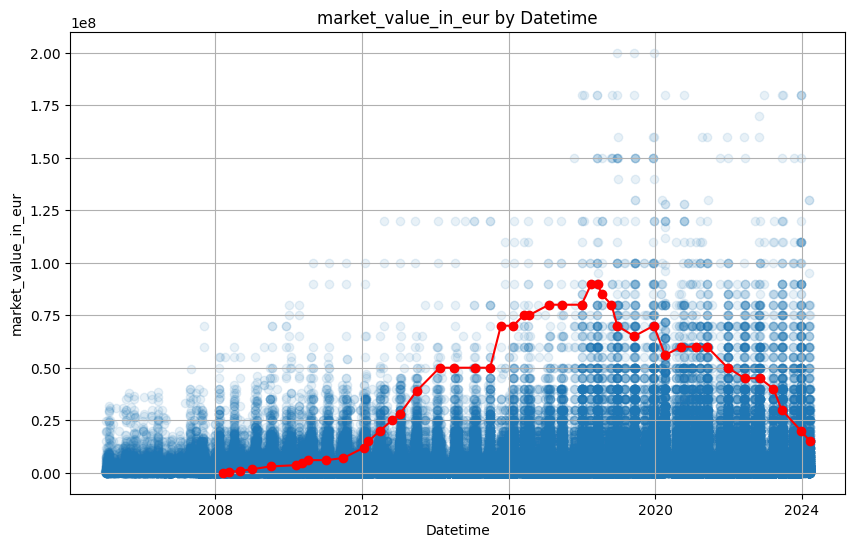

In [50]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(player_valuation_date_index.index, player_valuation_date_index['market_value_in_eur'], marker='o', linestyle='-',alpha=0.1)
plt.plot(player_valuation_date_index_top_goals.index, player_valuation_date_index_top_goals['market_value_in_eur'], marker='o', linestyle='-', c='red')
plt.title('market_value_in_eur by Datetime')
plt.xlabel('Datetime')
plt.ylabel('market_value_in_eur')
plt.grid(True)
plt.show()

# Prepared data to Regression

In [51]:
appearances_cleaned['player_id'].nunique()
player_valuation_ds = player_valuation.sort_values(by='date')

In [52]:
# # Hymn
# player_valuation_ds['total_goals'] = 0
# player_valuation_ds['total_yellow_cards'] = 0
# player_valuation_ds['total_red_cards'] = 0
# player_valuation_ds
# for player in (appearances_cleaned['player_id'].unique()):
#     for date in (np.array(player_valuation_ds[player_valuation_ds['player_id'] == player]['date'])):
#         player_valuation_ds.loc[(player_valuation_ds['player_id'] ==  player) & (player_valuation_ds['date'] == date), 'total_goals'] = appearances_cleaned.loc[(appearances_cleaned['player_id'] == player) & (appearances_cleaned['date'] <= date)]['goals'].sum()
#         player_valuation_ds.loc[(player_valuation_ds['player_id'] ==  player) & (player_valuation_ds['date'] == date), 'total_yellow_cards'] = appearances_cleaned.loc[(appearances_cleaned['player_id'] == player) & (appearances_cleaned['date'] <= date)]['yellow_cards'].sum()
#         player_valuation_ds.loc[(player_valuation_ds['player_id'] ==  player) & (player_valuation_ds['date'] == date), 'total_red_cards'] = appearances_cleaned.loc[(appearances_cleaned['player_id'] == player) & (appearances_cleaned['date'] <= date)]['red_cards'].sum()

In [53]:
# player_valuation_ds.to_csv('player_valuation_ds.csv')

In [71]:
player_valuation_ds = pd.read_csv("archive/player_valuation_ds.csv")
player_valuation_ds.head()

,Unnamed: 0,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,total_goals,total_yellow_cards,total_red_cards,total_assists,total_minutes_played
0,0,405973,2000-01-20,150000,3057,BE1,0,0,0,0,0
1,1,342216,2001-07-20,100000,1241,SC1,0,0,0,0,0
2,2,3132,2003-12-09,400000,126,TR1,0,0,0,0,0
3,3,6893,2003-12-15,900000,984,GB1,0,0,0,0,0
4,1108,14031,2004-10-04,50000,873,GB1,0,0,0,0,0


In [72]:
player_valuation_ds = player_valuation_ds.drop(columns=['Unnamed: 0'])
player_valuation_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465321 entries, 0 to 465320
Data columns (total 10 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            465321 non-null  int64 
 1   date                                 465321 non-null  object
 2   market_value_in_eur                  465321 non-null  int64 
 3   current_club_id                      465321 non-null  int64 
 4   player_club_domestic_competition_id  465321 non-null  object
 5   total_goals                          465321 non-null  int64 
 6   total_yellow_cards                   465321 non-null  int64 
 7   total_red_cards                      465321 non-null  int64 
 8   total_assists                        465321 non-null  int64 
 9   total_minutes_played                 465321 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 35.5+ MB


# ⚽️ Regression Player valuation

In [73]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [57]:
# player_valuation['total_hours'] = (player_valuation['date'] - player_valuation['date'].min()) / pd.Timedelta(hours=1)
# player_valuation

In [74]:
player_valuation_exob = player_valuation_ds.select_dtypes(exclude='object')
df_corr = abs(player_valuation_exob.corr())
df_corr = df_corr.sort_values(by='market_value_in_eur', ascending=False)
df_corr = df_corr.sort_values(by='market_value_in_eur', ascending=False, axis=1)
df_corr

,market_value_in_eur,total_assists,total_goals,total_minutes_played,total_yellow_cards,total_red_cards,current_club_id,player_id
market_value_in_eur,1.000000,0.421397,0.408179,0.367381,0.278843,0.133382,0.083551,0.028624
total_assists,0.421397,1.000000,0.788675,0.711792,0.596056,0.282881,0.046708,0.127140
total_goals,0.408179,0.788675,1.000000,0.600040,0.480945,0.253221,0.038965,0.107681
total_minutes_played,0.367381,0.711792,0.600040,1.000000,0.853567,0.488289,0.041657,0.191740
total_yellow_cards,0.278843,0.596056,0.480945,0.853567,1.000000,0.508170,0.017960,0.163905
total_red_cards,0.133382,0.282881,0.253221,0.488289,0.508170,1.000000,0.017901,0.101293
current_club_id,0.083551,0.046708,0.038965,0.041657,0.017960,0.017901,1.000000,0.051008
player_id,0.028624,0.127140,0.107681,0.191740,0.163905,0.101293,0.051008,1.000000


**Linear Regression**

In [76]:
xOne = 'total_goals'
xOne
df_train_notsort = player_valuation_ds
df_train = df_train_notsort.sort_values(by=xOne)
X = df_train.loc[:, df_train.columns == xOne].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [77]:
X = df_train.loc[:, df_train.columns == xOne].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [78]:
lr = LinearRegression()
lr.fit(X, y)
# Predict results
y_pred_lr = lr.predict(X)           
# Linear Regression

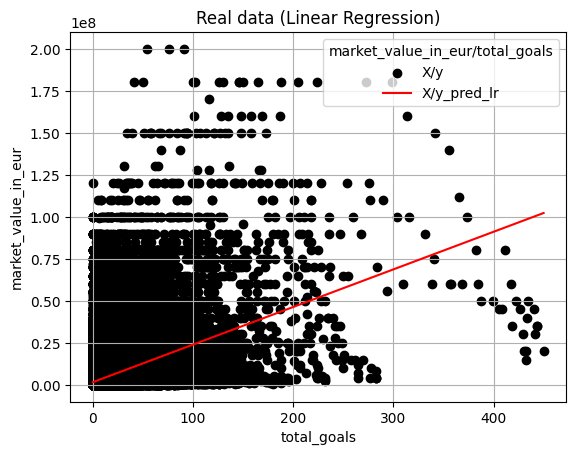

In [79]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'black')
plt.plot(X, y_pred_lr, color = 'red')
plt.title('Real data (Linear Regression)')
plt.xlabel(xOne)
plt.ylabel('market_value_in_eur')
plt.legend(['X/y', 'X/y_pred_lr'], title = 'market_value_in_eur/' + xOne, loc='best', facecolor='white')
# plt.box(False)
plt.grid()
plt.show()

In [80]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred_lr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred_lr))

Coefficients: 
 [223856.58779406]
Mean squared error: 36994862006872.95
Coefficient of determination: 0.17


**Polynomial Regression**

In [81]:
xOne = 'total_goals'
xOne
df_train_notsort = player_valuation_ds.drop(columns=['date'])

In [82]:
df_train_notsort.head()

,player_id,market_value_in_eur,current_club_id,player_club_domestic_competition_id,total_goals,total_yellow_cards,total_red_cards,total_assists,total_minutes_played
0,405973,150000,3057,BE1,0,0,0,0,0
1,342216,100000,1241,SC1,0,0,0,0,0
2,3132,400000,126,TR1,0,0,0,0,0
3,6893,900000,984,GB1,0,0,0,0,0
4,14031,50000,873,GB1,0,0,0,0,0


In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

df_encoded = df_train_notsort

for a in df_train_notsort.select_dtypes(include='object').columns:
    # Fit and transform the data
    one_hot_encoded = encoder.fit_transform(df_encoded[[a]])

    # Convert sparse matrix to DataFrame
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([a]))

    one_hot_encoded_df.set_index(pd.Index(df_encoded.index), inplace=True)

    # # Concatenate with original DataFrame to maintain other columns
    df_encoded = pd.concat([df_encoded, one_hot_encoded_df],axis=1)

df_encoded = df_encoded.select_dtypes(exclude='object')
df_encoded.head()

,player_id,market_value_in_eur,current_club_id,total_goals,total_yellow_cards,total_red_cards,total_assists,total_minutes_played,player_club_domestic_competition_id_BE1,player_club_domestic_competition_id_DK1,...,player_club_domestic_competition_id_GB1,player_club_domestic_competition_id_GR1,player_club_domestic_competition_id_IT1,player_club_domestic_competition_id_L1,player_club_domestic_competition_id_NL1,player_club_domestic_competition_id_PO1,player_club_domestic_competition_id_RU1,player_club_domestic_competition_id_SC1,player_club_domestic_competition_id_TR1,player_club_domestic_competition_id_UKR1
0,405973,150000,3057,0,0,0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,342216,100000,1241,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3132,400000,126,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6893,900000,984,0,0,0,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14031,50000,873,0,0,0,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465321 entries, 0 to 465320
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   player_id                                 465321 non-null  int64  
 1   market_value_in_eur                       465321 non-null  int64  
 2   current_club_id                           465321 non-null  int64  
 3   total_goals                               465321 non-null  int64  
 4   total_yellow_cards                        465321 non-null  int64  
 5   total_red_cards                           465321 non-null  int64  
 6   total_assists                             465321 non-null  int64  
 7   total_minutes_played                      465321 non-null  int64  
 8   player_club_domestic_competition_id_BE1   465321 non-null  float64
 9   player_club_domestic_competition_id_DK1   465321 non-null  float64
 10  player_club_domestic

In [85]:
df_train = df_encoded.sort_values(by=xOne)
X = df_train.loc[:, df_train.columns == xOne].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [86]:
X = df_train.loc[:, df_train.columns != 'market_value_in_eur'].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [91]:
pr = PolynomialFeatures(degree = 3)
X_poly = pr.fit_transform(X)
lr_p = LinearRegression()
lr_p.fit(X_poly, y)
# Predict results
y_pred_poly = lr_p.predict(X_poly)  # Polynomial Regression

In [88]:
y_pred_poly

array([-7.22833176e+05,  2.12682095e+06,  1.08225654e+06, ...,
        1.10980282e+08,  1.10980282e+08,  4.63391332e+07])

/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_33295/2421728542.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_33295/2421728542.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_normal), max(X_normal), 0.1)


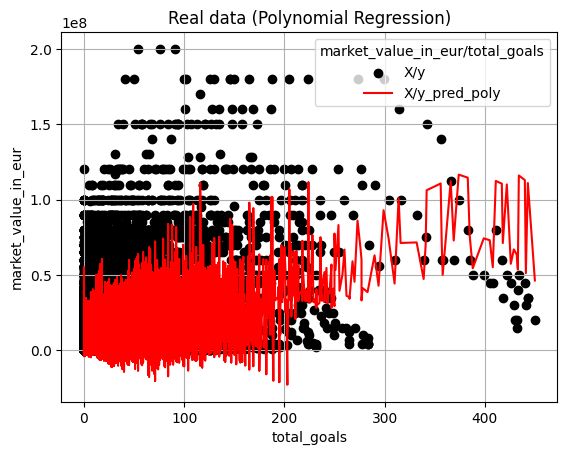

In [89]:
# Visualize real data with polynomial regression
X_normal = df_train.loc[:, df_train.columns == xOne].values  # independent

X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# rangestart = 0
# rangestop = 500
# X_grid = np.arange(min(X_normal[rangestart:rangestop]), max(X_normal[rangestart:rangestop]), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X_normal[rangestart:rangestop], y[rangestart:rangestop], color = 'black')
# plt.plot(X_normal[rangestart:rangestop], y_pred_poly[rangestart:rangestop], color = 'red', alpha=0.5)

X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_normal, y, color = 'black')
plt.plot(X_normal, y_pred_poly, color = 'red', alpha=1)

plt.title('Real data (Polynomial Regression)')
plt.xlabel(xOne)
plt.ylabel('market_value_in_eur')
plt.legend(['X/y', 'X/y_pred_poly'], title = 'market_value_in_eur/' + xOne, loc='best', facecolor='white')
# plt.box(False)
plt.grid()
plt.show()

In [90]:
# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred_poly))

Coefficients: 
 [223856.58779406]
Mean squared error: 25363714093067.78
Coefficient of determination: 0.43


In [2]:
xOne = 'total_goals'
xOne
df_train_notsort = player_valuation_ds[player_valuation_ds['player_id'].isin(players_cleaned.loc[players_cleaned['position'] == 'Attack', 'player_id'])].drop(columns=['date'])

NameError: name 'player_valuation_ds' is not defined

In [1]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

df_encoded = df_train_notsort

for a in df_train_notsort.select_dtypes(include='object').columns:
    # Fit and transform the data
    one_hot_encoded = encoder.fit_transform(df_encoded[[a]])

    # Convert sparse matrix to DataFrame
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([a]))

    one_hot_encoded_df.set_index(pd.Index(df_encoded.index), inplace=True)

    # # Concatenate with original DataFrame to maintain other columns
    df_encoded = pd.concat([df_encoded, one_hot_encoded_df],axis=1)

df_encoded = df_encoded.select_dtypes(exclude='object')
df_encoded.head()

NameError: name 'df_train_notsort' is not defined

In [72]:
df_train = df_encoded.sort_values(by=xOne)
X = df_train.loc[:, df_train.columns == xOne].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [73]:
X = df_train.loc[:, df_train.columns != 'market_value_in_eur'].values  # independent
y = df_train.loc[:, 'market_value_in_eur'].values  # dependent

In [74]:
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_p = LinearRegression()
lr_p.fit(X_poly, y)
# Predict results
y_pred_poly = lr_p.predict(X_poly)  # Polynomial Regression

/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_1050/3008595084.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_1050/3008595084.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_normal), max(X_normal), 0.1)


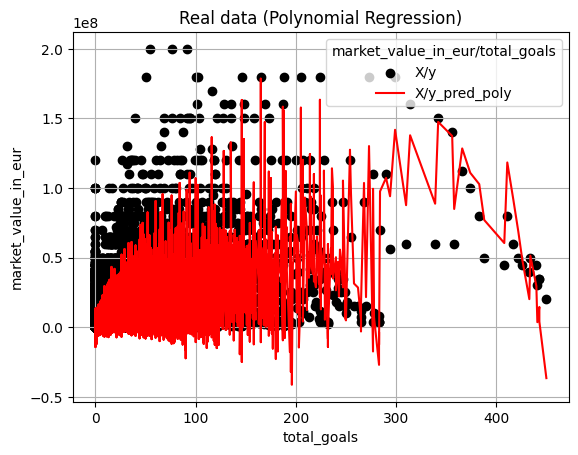

Coefficients: 
 [223856.58779406]
Mean squared error: 27074945194825.11
Coefficient of determination: 0.60


In [ ]:
# Visualize real data with polynomial regression
X_normal = df_train.loc[:, df_train.columns == xOne].values  # independent

X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

X_grid = np.arange(min(X_normal), max(X_normal), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_normal, y, color = 'black')
plt.plot(X_normal, y_pred_poly, color = 'red', alpha=1)

plt.title('Real data (Polynomial Regression)')
plt.xlabel(xOne)
plt.ylabel('market_value_in_eur')
plt.legend(['X/y', 'X/y_pred_poly'], title = 'market_value_in_eur/' + xOne, loc='best', facecolor='white')
# plt.box(False)
plt.grid()
plt.show()

# The coefficients
print("Coefficients: \n", lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred_poly))

# Goals Player

In [ ]:
player_valuation_top_goal = player_valuation[player_valuation['player_id'].isin(players[players['position'] == 'Goalkeeper']['player_id'])].sort_values(by='market_value_in_eur', ascending=False)
player_valuation_top_goal

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
272740,121483,2019-06-11,100000000,13,ES1
292818,121483,2019-12-20,100000000,13,ES1
325342,121483,2020-10-08,90000000,13,ES1
338663,121483,2021-01-05,90000000,13,ES1
292714,74857,2019-12-20,90000000,131,ES1
...,...,...,...,...,...
360726,18350,2021-06-17,10000,47,GR1
388928,667915,2022-02-14,10000,6646,TR1
453014,880333,2023-08-27,10000,833,TR1
453008,511790,2023-08-27,10000,2944,TR1


In [ ]:
players[players['player_id'].isin(player_valuation_top_goal['player_id'].head(1))]['player_id']

8739    121483
Name: player_id, dtype: int64

In [ ]:
no1goal = players[players['player_id'].isin(player_valuation_top_goal['player_id'].head(1))]['player_id'].head(1)
no1goal

8739    121483
Name: player_id, dtype: int64

In [ ]:
player_valuation['player_id'].isin(no1goal)

0         False
1         False
2         False
3         False
4         False
          ...  
466897    False
466898    False
466899    False
466900    False
466901    False
Name: player_id, Length: 466902, dtype: bool

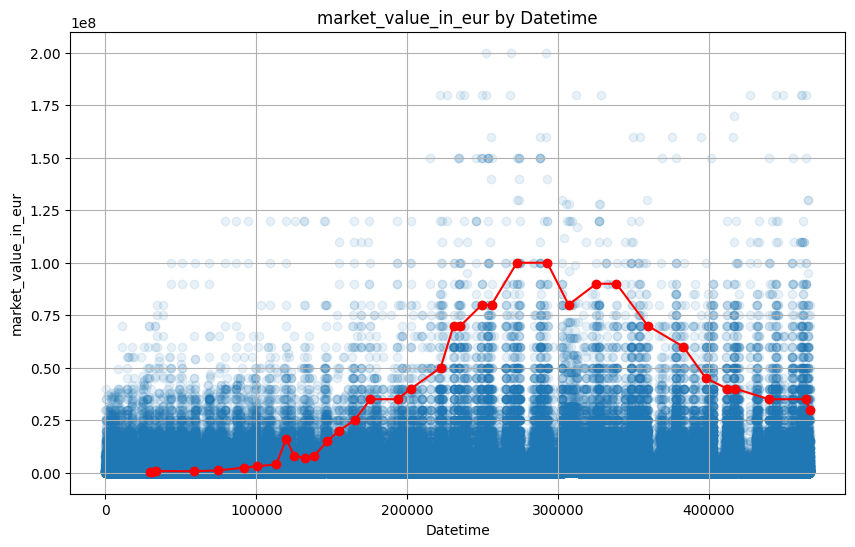

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(player_valuation.index, player_valuation['market_value_in_eur'], marker='o', linestyle='-',alpha=0.1)
plt.plot(player_valuation[player_valuation['player_id'].isin( no1goal)].index, player_valuation[player_valuation['player_id'].isin( no1goal)]['market_value_in_eur'], marker='o', linestyle='-', c='red')
plt.title('market_value_in_eur by Datetime')
plt.xlabel('Datetime')
plt.ylabel('market_value_in_eur')
plt.grid(True)
plt.show()

# Heatmap

In [ ]:
top6 = np.array(clubs_clean_modify[clubs_clean_modify['domestic_competition_id'] == 'GB1'].sort_values(by='is_win', ascending=False).head(6)['club_id'])

In [ ]:
data = []
for club in top6:
    pos_data = []
    for position in players['position'].unique():
        pos_data.append( appearances_cleaned[(appearances_cleaned['player_id'].isin(players[(players['player_id'].isin(appearances_cleaned.loc[appearances_cleaned['player_current_club_id'] == club]['player_id'])) 
                            & (players['position'] == position)]['player_id']))
                            ]['red_cards'].sum())
    data.append(pos_data)
print(data)

[[1, 2, 9, 6, 0], [2, 3, 5, 5, 0], [1, 2, 14, 3, 0], [1, 0, 7, 4, 0], [8, 0, 7, 6, 0], [7, 3, 5, 7, 0]]


In [ ]:
(players['position'].unique())

array(['Attack', 'Goalkeeper', 'Defender', 'Midfield', 'Missing'],
      dtype=object)

In [ ]:
clubs_clean_modify[clubs_clean_modify['club_id'].isin(top6)]['name']

4      Tottenham Hotspur Football Club
23             Liverpool Football Club
123    Manchester United Football Club
173              Arsenal Football Club
177      Manchester City Football Club
214              Chelsea Football Club
Name: name, dtype: object

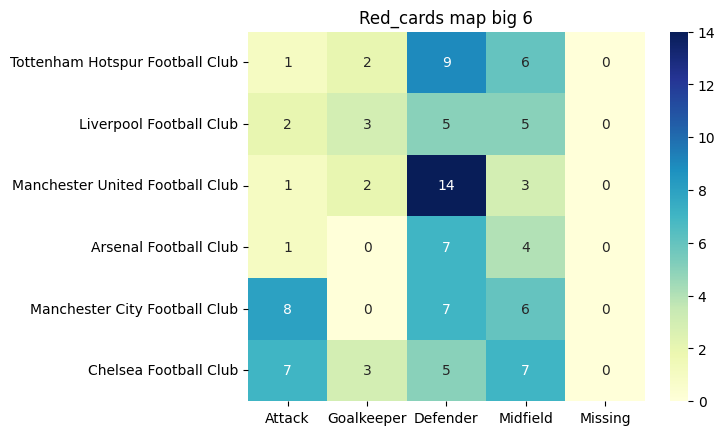

In [ ]:
# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap="YlGnBu", xticklabels = players['position'].unique(), yticklabels= np.array(clubs_clean_modify[clubs_clean_modify['club_id'].isin(top6)]['name']))  # Change 'YlGnBu' for different colormaps

# Add labels and title
# plt.xlabel("Column Labels (replace with yours)")
# plt.ylabel("Row Labels (replace with yours)")
plt.title("Red_cards map big 6")

# Display the heatmap
plt.show()


[[84, 49, 270, 361, 0], [147, 24, 297, 262, 0], [119, 27, 405, 261, 0], [110, 13, 279, 312, 0], [199, 50, 514, 474, 0], [170, 30, 235, 444, 0]]


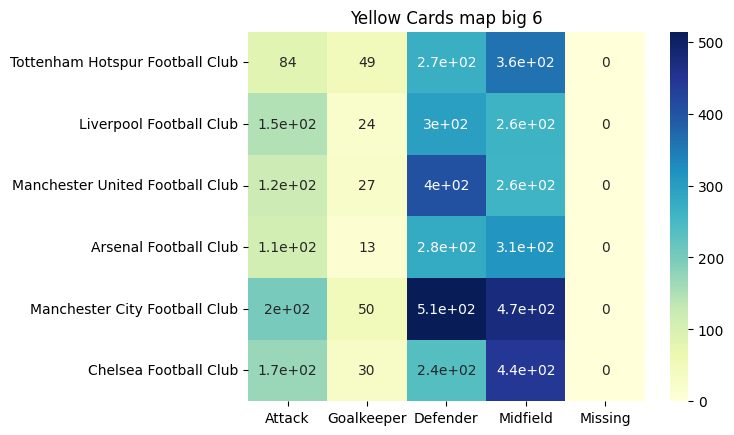

In [ ]:
data = []
for club in top6:
    pos_data = []
    for position in players['position'].unique():
        pos_data.append( appearances_cleaned[(appearances_cleaned['player_id'].isin(players[(players['player_id'].isin(appearances_cleaned.loc[appearances_cleaned['player_current_club_id'] == club]['player_id'])) 
                            & (players['position'] == position)]['player_id']))
                            ]['yellow_cards'].sum())
    data.append(pos_data)
print(data)
# Create a heatmap using seaborn
sns.heatmap(data, annot=True, cmap="YlGnBu", xticklabels = players['position'].unique(), yticklabels= np.array(clubs_clean_modify[clubs_clean_modify['club_id'].isin(top6)]['name']))  # Change 'YlGnBu' for different colormaps

# Add labels and title
# plt.xlabel("Column Labels (replace with yours)")
# plt.ylabel("Row Labels (replace with yours)")
plt.title("Yellow Cards map big 6")

# Display the heatmap
plt.show()

# clubs win share

In [ ]:
clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('m','000000'))
clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('k','000'))
clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('+-0','0'))
clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('€','')).astype(float)

/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_1050/2081083268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('m','000000'))
/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/ipykernel_1050/2081083268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_features['net_transfer_record'] = (clubs_features['net_transfer_record'].str.replace('k','000'))
/var/folders/4g/8j_z4q0n2zlftk4s8jmrj1sw0000gn/T/

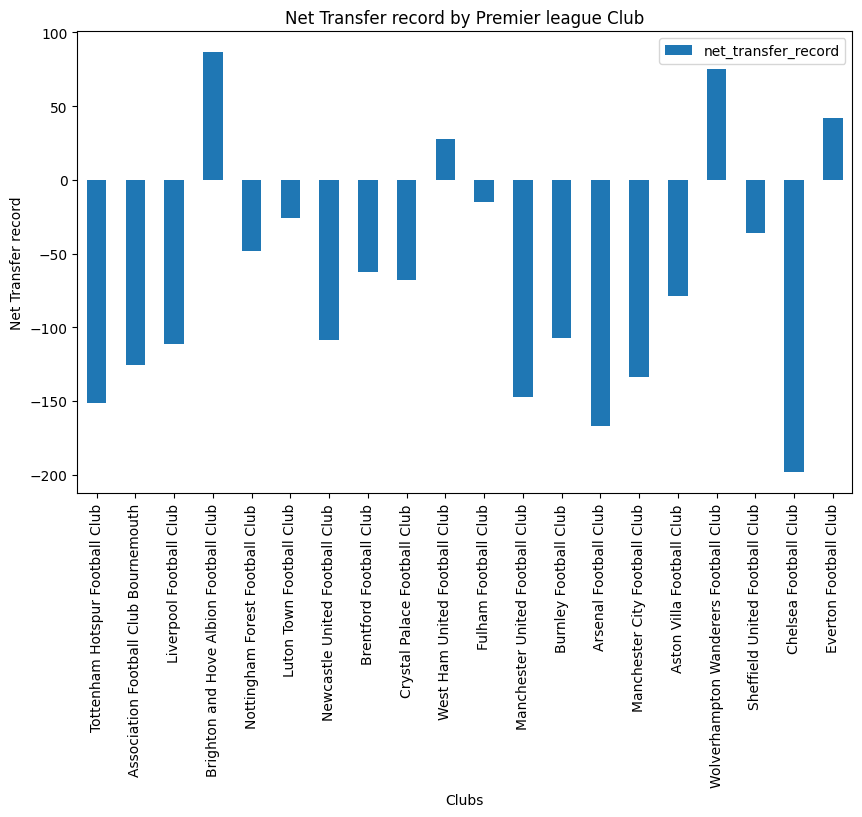

In [ ]:
gb1_clubs_features = clubs_features[clubs_features['domestic_competition_id'] == 'GB1']

# Plotting
gb1_clubs_features.plot(kind='bar', x='name', y='net_transfer_record', figsize=(10, 6), title='Net Transfer record by Premier league Club')
plt.xlabel('Clubs')
plt.ylabel('Net Transfer record')
plt.show()